<a href="https://colab.research.google.com/github/archie-sinha/Evolutionary-Computing/blob/main/EC_9_Particle_Swarm_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Archisha Sinha
##Topic: Particle Swarm Optimization (PSO)
##Domain: Evolutionary Computing

###Aim: Implementation of PSO Algorithm


##Basic Particle Swarm Optimization


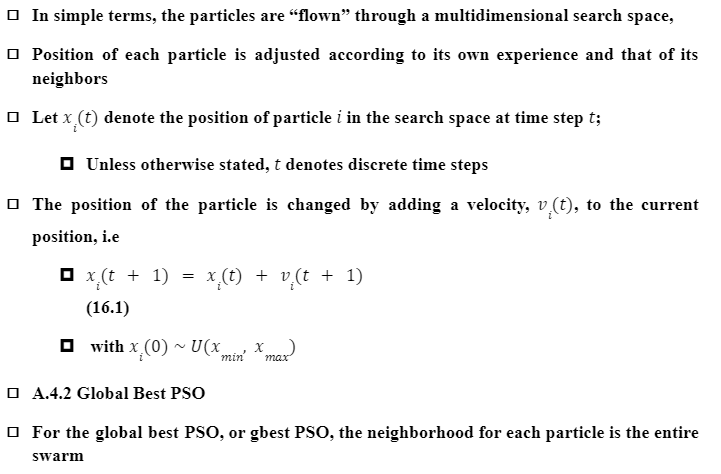

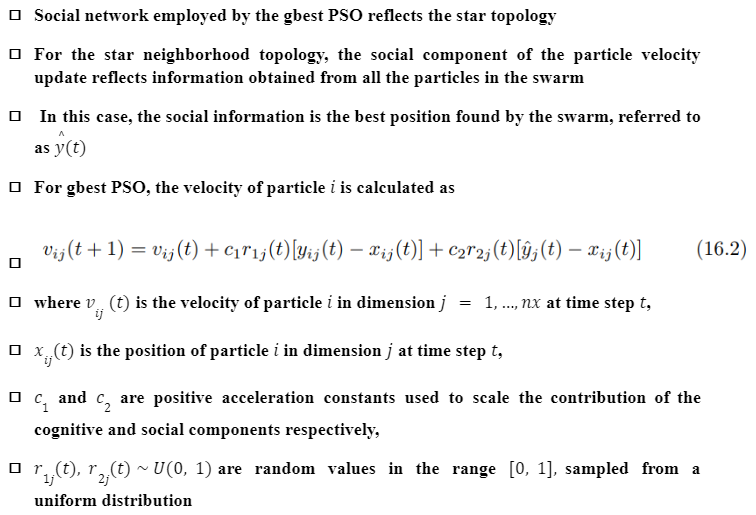

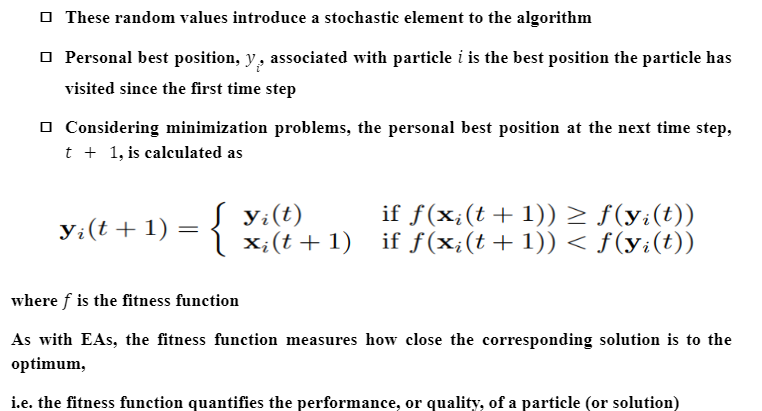

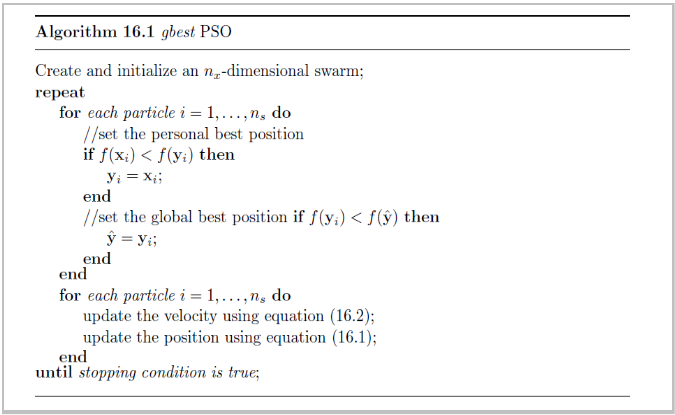

In [1]:
import numpy as np

In [2]:
# Define the objective function
def objective_function(x):
    return 100*x[0] - x[1]**2 + 1 - x[1]

In [3]:
# Define the bounds for x1 and x2
bounds = ([-5, -5], [5, 5])

In [4]:
# Define the PSO function
def pso(objective_function, bounds, num_particles, max_iter):
    num_dimensions = len(bounds[0])
    best_global_position = np.zeros(num_dimensions)
    best_global_fitness = float('inf')

    # Initialize particles
    particles_position = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
    particles_velocity = np.zeros((num_particles, num_dimensions))
    particles_best_position = particles_position.copy()
    particles_best_fitness = np.full(num_particles, float('inf'))

    for _ in range(max_iter):
        for i in range(num_particles):
            fitness = objective_function(particles_position[i])

            if fitness < particles_best_fitness[i]:
                particles_best_fitness[i] = fitness
                particles_best_position[i] = particles_position[i]

            if fitness < best_global_fitness:
                best_global_fitness = fitness
                best_global_position = particles_position[i]

            # Update velocity and position
            inertia_weight = 0.5
            cognitive_weight = 1.5
            social_weight = 1.5

            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_velocity = cognitive_weight * r1 * (particles_best_position[i] - particles_position[i])
            social_velocity = social_weight * r2 * (best_global_position - particles_position[i])

            particles_velocity[i] = inertia_weight * particles_velocity[i] + cognitive_velocity + social_velocity
            particles_position[i] += particles_velocity[i]

            # Clip particle position to stay within bounds
            particles_position[i] = np.clip(particles_position[i], bounds[0], bounds[1])

    return best_global_position, best_global_fitness

In [5]:
# Set parameters for PSO
num_particles = 30
max_iter = 100

In [6]:
# Run PSO algorithm
best_solution, best_fitness = pso(objective_function, bounds, num_particles, max_iter)

In [7]:
print("Best solution found:")
print("x1 =", best_solution[0])
print("x2 =", best_solution[1])
print("Minimum value:", best_fitness)

Best solution found:
x1 = -5.0
x2 = -5.0
Minimum value: -519.0


##Conclusion:
The PSO algorithm used in the example efficiently optimizes a function by iteratively updating particle positions based on their best-known positions and the global best position, demonstrating effective convergence towards the optimal solution with dynamic parameter adjustments